In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel, laplacian_kernel

%matplotlib inline

In [19]:
pairs = pd.read_csv('data/pair0039.txt', sep=' ', header=None)
pairs.columns = ['X', 'Y']

In [3]:
pairs.shape

(394, 2)

In [6]:
def plot_both(pairs):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(pairs['X'], pairs['Y'])
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.subplot(1, 2, 2)
    plt.scatter(pairs['Y'], pairs['X'])
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.show()

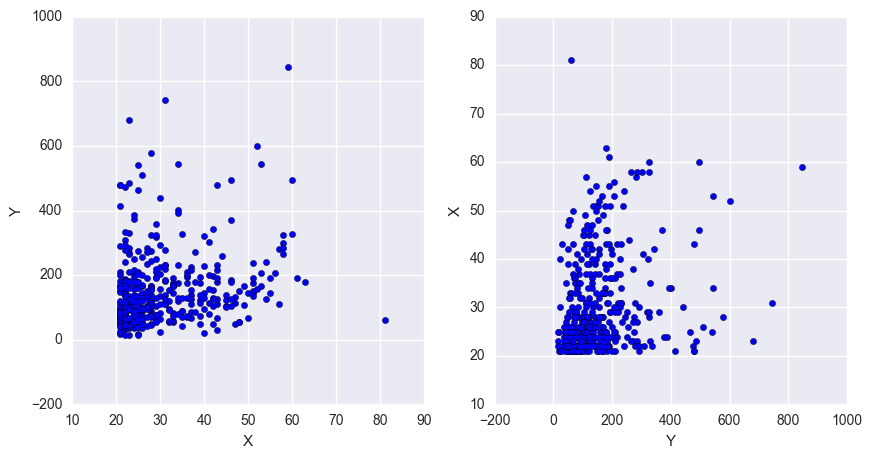

In [7]:
plot_both(pairs)

In [70]:
def HSIC_d(X, Y, kernel='exponential'):
    n = len(X)

    if kernel == 'exponential':
        apply_kernel = rbf_kernel
    elif kernel == 'laplacian':
        apply_kernel = laplacian_kernel
    K = apply_kernel(X.reshape(-1, 1))
    L = apply_kernel(Y.reshape(-1, 1))
    
    H = np.eye(n) - np.ones((n, n)) * (1.0 / n)
    return ((n - 1) ** -2) * np.trace(np.dot(np.dot(np.dot(K, H), L), H))

In [71]:
HSIC_d(pairs['X'], pairs['Y'], kernel='exponential')

0.0021864339084847811

In [74]:
HSIC_d(pairs['X'], pairs['Y'], kernel='laplacian')

0.002181531854513287